In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from datasets import load_dataset
from scipy.stats import pearsonr
import joblib

In [2]:
# Step 1: Load the dataset
data = load_dataset("aai530-group6/pmdata-sleep_scores")

# Convert to DataFrame
data_train = pd.DataFrame(data['train'])

Found cached dataset csv (C:/Users/X1/.cache/huggingface/datasets/aai530-group6___csv/aai530-group6--pmdata-sleep_scores-9e4024ad587de589/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1)


  0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
# Step 2: Data Exploration
print("Dataset Overview:")
print(data_train.head())

print("Summary Statistics:")
print(data_train.describe())

print("Missing Values:")
print(data_train.isnull().sum())

Dataset Overview:
                   timestamp  sleep_log_entry_id  overall_score  \
0  2023-09-28 14:00:00+00:00         24472394143             76   
1  2023-09-28 14:18:30+00:00         24492529242             84   
2  2023-09-28 14:58:30+00:00         24473888347             35   
3  2023-09-28 17:45:30+00:00         24475133162             82   
4  2023-09-29 13:19:00+00:00         24492529243             73   

   composition_score  revitalization_score  duration_score  \
0                 18                    20              38   
1                 22                    20              42   
2                 14                    18               3   
3                 21                    23              38   
4                 21                    18              34   

   deep_sleep_in_minutes  resting_heart_rate  restlessness  
0                     27                  53      0.053635  
1                     83                  63      0.090815  
2                     6

In [4]:
# Step 3: Data Preprocessing
# Handle missing values (drop or impute based on strategy)
data_train = data_train.dropna()  # Dropping rows with missing values for simplicity

# Normalize numerical columns
numeric_cols = ["overall_score", "deep_sleep_in_minutes", "restlessness", "resting_heart_rate"]
data_train[numeric_cols] = (data_train[numeric_cols] - data_train[numeric_cols].mean()) / data_train[numeric_cols].std()


c:\Users\X1\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


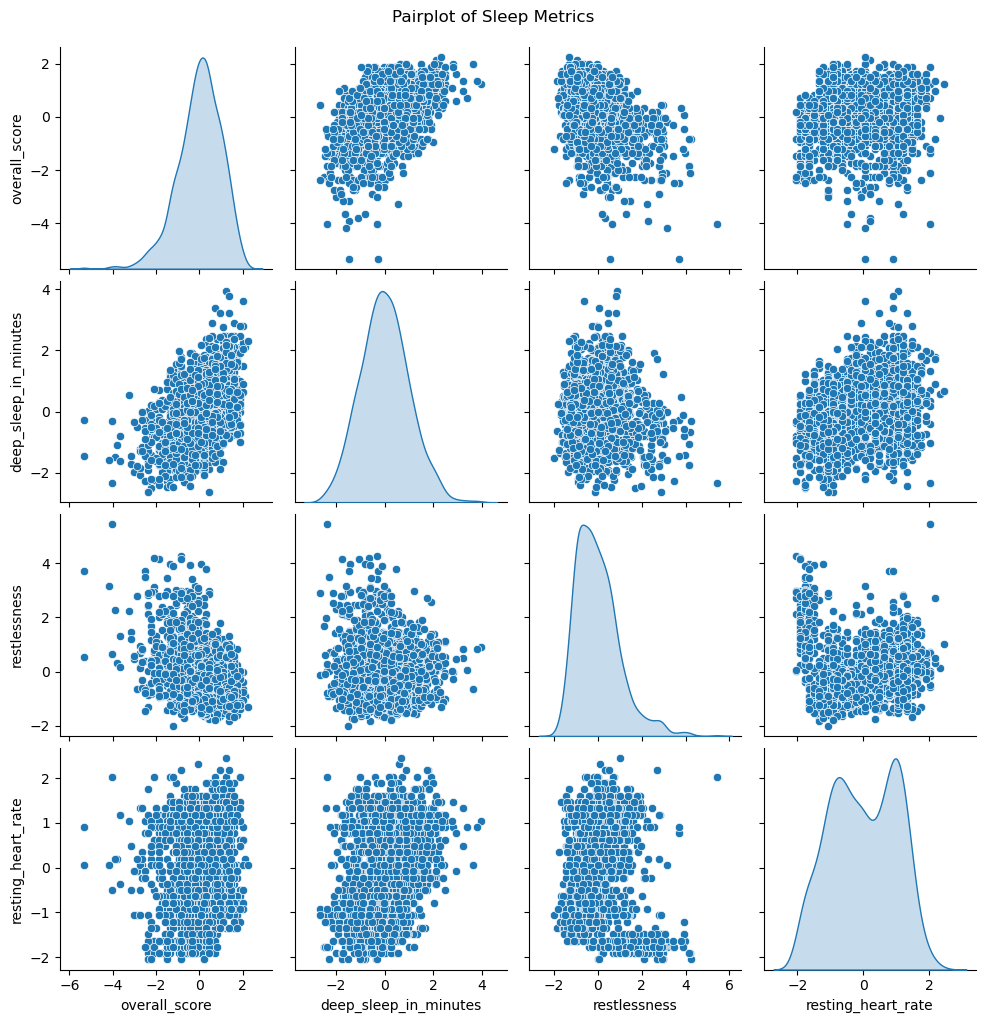

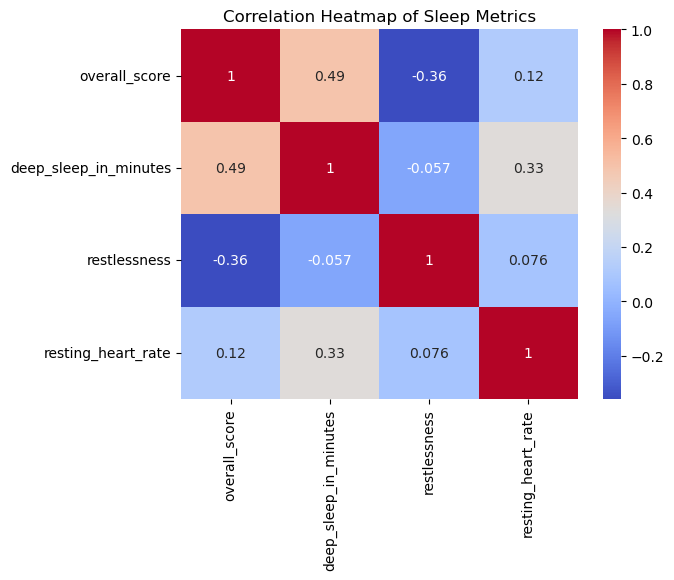

In [5]:
# Step 4: Visualization
sns.pairplot(data_train[numeric_cols], diag_kind='kde')
plt.suptitle("Pairplot of Sleep Metrics", y=1.02)
plt.show()

# Correlation Heatmap
correlation_matrix = data_train[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Sleep Metrics")
plt.show()

In [6]:
# Step 5: Feature Engineering
# Add interaction terms
interaction_term = data_train['deep_sleep_in_minutes'] * data_train['restlessness']
data_train['deep_sleep_restlessness_interaction'] = interaction_term

In [7]:
# Step 6: Model Training and Comparison
# Define features and target
features = ["deep_sleep_in_minutes", "restlessness", "resting_heart_rate", "deep_sleep_restlessness_interaction"]
X = data_train[features]
y = data_train["overall_score"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
gb_r2 = r2_score(y_test, gb_pred)

# Support Vector Regression
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_pred))
svr_r2 = r2_score(y_test, svr_pred)

In [8]:
# Step 7: Model Evaluation
print(f"Random Forest RMSE: {rf_rmse:.2f}, R2: {rf_r2:.2f}")
print(f"Gradient Boosting RMSE: {gb_rmse:.2f}, R2: {gb_r2:.2f}")
print(f"Support Vector Regression RMSE: {svr_rmse:.2f}, R2: {svr_r2:.2f}")


Random Forest RMSE: 0.85, R2: 0.23
Gradient Boosting RMSE: 0.80, R2: 0.31
Support Vector Regression RMSE: 0.78, R2: 0.35


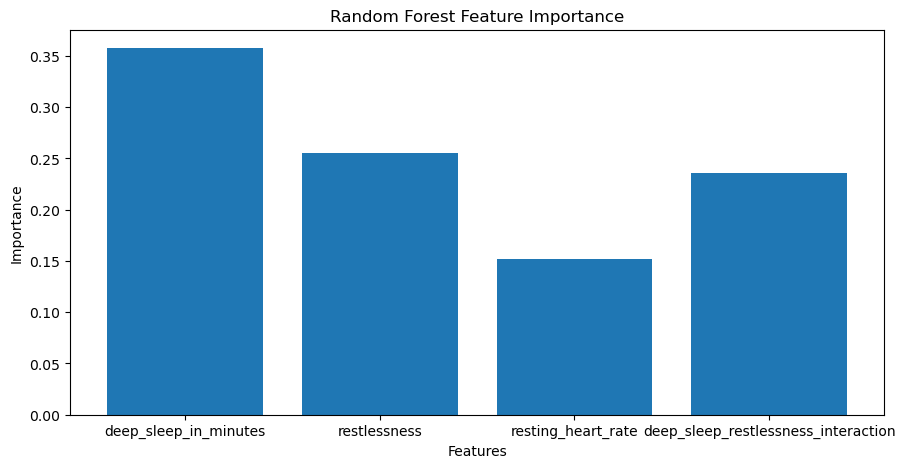

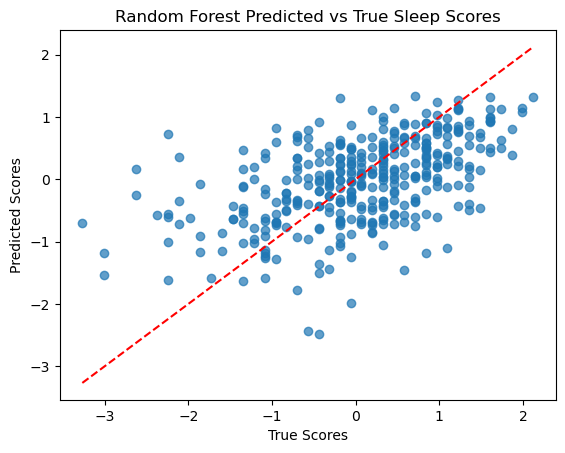

In [15]:
# Step 8: Insights Visualization
# Feature importance for Random Forest
plt.figure(figsize=(10.5, 5))  # Increase figure size
rf_importances = rf_model.feature_importances_
plt.bar(features, rf_importances)
plt.title("Random Forest Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

# Predictions vs True Values for Random Forest
plt.scatter(y_test, rf_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title("Random Forest Predicted vs True Sleep Scores")
plt.xlabel("True Scores")
plt.ylabel("Predicted Scores")
plt.show()

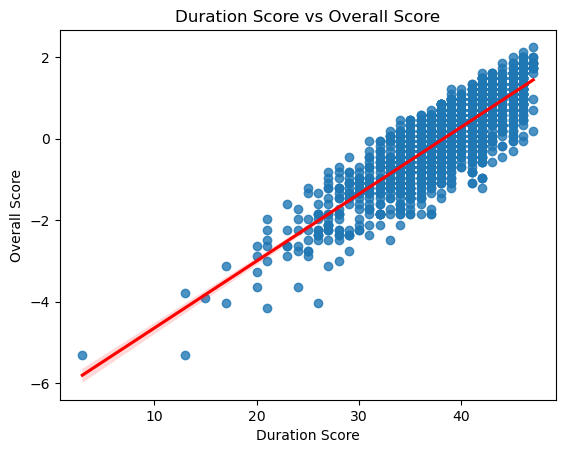

Correlation between Duration Score and Overall Score: 0.85


In [10]:
# Step 9: Additional Research Question
# Explore the relationship between duration score and other metrics
sns.regplot(x="duration_score", y="overall_score", data=data_train, line_kws={"color": "red"})
plt.title("Duration Score vs Overall Score")
plt.xlabel("Duration Score")
plt.ylabel("Overall Score")
plt.show()

# Correlation between duration_score and overall_score
duration_corr, _ = pearsonr(data_train['duration_score'], data_train['overall_score'])
print(f"Correlation between Duration Score and Overall Score: {duration_corr:.2f}")


In [11]:
# Step 10: Deliverables
# Save the processed dataset and models
processed_data_path = "processed_sleep_data.csv"
data_train.to_csv(processed_data_path, index=False)
print(f"Processed data saved to {processed_data_path}")

rf_model_path = "rf_sleep_score_model.pkl"
gb_model_path = "gb_sleep_score_model.pkl"
svr_model_path = "svr_sleep_score_model.pkl"
joblib.dump(rf_model, rf_model_path)
joblib.dump(gb_model, gb_model_path)
joblib.dump(svr_model, svr_model_path)
print(f"Random Forest model saved to {rf_model_path}")
print(f"Gradient Boosting model saved to {gb_model_path}")
print(f"SVR model saved to {svr_model_path}")


Processed data saved to processed_sleep_data.csv
Random Forest model saved to rf_sleep_score_model.pkl
Gradient Boosting model saved to gb_sleep_score_model.pkl
SVR model saved to svr_sleep_score_model.pkl
